Factorisation de matrices non négatives:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.decomposition import NMF, PCA
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import svm

list_train = []
list_test = []
label_train=[]
label_test=[]
train_ids_fem_pato = [1,6,7,12,13,19,25]
test_ids_fem_pato = [20,22,14]
train_ids_fem_sain = [49,59,60,63,66,67,68]
test_ids_fem_sain = [58,64,73,71,74,2]

datadir='/content/drive/MyDrive/cartes_epaisseur' 

for i in train_ids_fem_pato:
    image_name = '/femur_patho/Femur_%02d.png'%(i)
    label_train.append("pathologique")
    list_train.append(datadir + image_name)

for i in test_ids_fem_pato:
    image_name = '/femur_patho/Femur_%02d.png'%(i)
    label_test.append("pathologique")
    list_test.append(datadir + image_name)

for i in train_ids_fem_sain:
    image_name = '/femur/Femur_%02d.png'%(i)
    label_train.append("sain")
    list_train.append(datadir + image_name)

for i in test_ids_fem_sain:
    image_name = '/femur/Femur_%02d.png'%(i)
    label_test.append("sain")
    list_test.append(datadir + image_name)



In [ ]:
i=0
train_mat=np.zeros((90000,len(list_train)))
print(list_train)
#train_mat_sain=np.zeros((90000,len(train_ids_tib_sain)))
for img in list_train:
    print(img)
    img_array=cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    train_mat[:,i]=img_array.flatten()
    i+=1

j=0
test_mat=np.zeros((90000,len(list_test)))
for img in list_test:
    img_array=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    test_mat[:,j]=img_array.flatten()
    j+=1


['/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_01.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_06.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_07.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_12.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_13.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_19.png', '/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_25.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_49.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_59.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_60.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_63.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_66.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_67.png', '/content/drive/MyDrive/cartes_epaisseur/femur/Femur_68.png']
/content/drive/MyDrive/cartes_epaisseur/femur_patho/Femur_01.png
/content/drive/MyDrive/c

In [ ]:
model = NMF(n_components=20, init='random', random_state=0)
W_train = model.fit_transform(train_mat)
H_train = model.components_
print(np.dot(np.array(W_train),np.array(H_train)))
print(np.shape(W_train))
print(np.shape(H_train))

H_test=np.dot(np.linalg.inv(W_train.T @ W_train) @ W_train.T , test_mat)

#[-694125.404214712, -378617.5187082729, -52962.619759138375, -36142.35450058719, -49389.040804760305, -20768.601889761234]



[[8.90625241e-05 5.73238980e-03 0.00000000e+00 ... 4.72160174e-05
  0.00000000e+00 1.80009634e+01]
 [1.13802110e-04 9.87419862e-03 0.00000000e+00 ... 5.42984367e-04
  0.00000000e+00 2.30012303e+01]
 [1.33593781e-04 1.13420451e-02 0.00000000e+00 ... 5.90200397e-04
  0.00000000e+00 2.70014443e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(90000, 16)
(16, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
print(np.shape(H_train.T))

(14, 16)


In [ ]:
svc=svm.SVC(probability=True)

svc.fit(H_train.T,label_train)

SVC(probability=True)

In [ ]:
y_pred=svc.predict(H_test.T)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(label_test))
print(f"The model is {accuracy_score(label_test,y_pred)*100}% accurate")
print("f1:")
f1_score(label_test,y_pred)
print("precision:")
precision_score(label_test,y_pred)
print("recall:")
recall_score(label_test,y_pred)

The predicted Data is :
['sain' 'sain' 'sain' 'sain' 'sain' 'sain' 'pathologique' 'sain' 'sain'
 'sain']
The actual data is:
['pathologique' 'pathologique' 'pathologique' 'sain' 'sain' 'sain' 'sain'
 'sain' 'sain' 'sain']
The model is 60.0% accurate


10
The model is 44.44444444444444% accurate
11
The model is 66.66666666666666% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


12
The model is 55.55555555555556% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


13
The model is 44.44444444444444% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


14
The model is 44.44444444444444% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


15
The model is 77.77777777777779% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


16
The model is 66.66666666666666% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


17
The model is 66.66666666666666% accurate
18
The model is 66.66666666666666% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


19
The model is 77.77777777777779% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


20
The model is 77.77777777777779% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


21
The model is 66.66666666666666% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


22
The model is 77.77777777777779% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


23
The model is 66.66666666666666% accurate
24
The model is 66.66666666666666% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


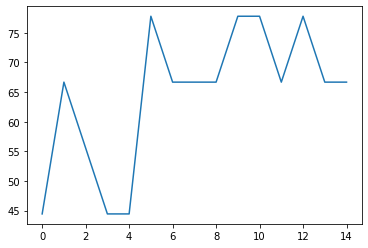

In [ ]:
acc_list=[]
for i in range(10,25):
  model = NMF(n_components=i, init='random', random_state=0)
  W_train = model.fit_transform(train_mat)
  H_train = model.components_
  H_test=np.dot(np.linalg.inv(W_train.T @ W_train) @ W_train.T , test_mat)
  svc=svm.SVC(probability=True)
  svc.fit(H_train.T,label_train)
  y_pred=svc.predict(H_test.T)
  print(i)
  print(f"The model is {accuracy_score(y_pred,label_test)*100}% accurate")
  acc_list.append(accuracy_score(y_pred,label_test)*100)

plt.plot(acc_list)